In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

%matplotlib inline
sns.set(rc={"figure.figsize": (13, 10)})

# Load Data

In [2]:
train_data = pd.read_csv("./data/train.csv", index_col='id')
valid_data = pd.read_csv("./data/test.csv", index_col='id')
datasets = [train_data, valid_data]
train_data.shape, valid_data.shape

((26570, 25), (20775, 24))

# First look at the data

In [3]:
train_data.head(3)


,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0


In [4]:
valid_data.head(3)

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
id,,,,,,,,,,,,,,,,,,,,,
26570,F,119.57,material_5,material_6,6,4,6,9,6,19.305,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
26571,F,113.51,material_5,material_6,6,4,11,8,0,17.883,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
26572,F,112.16,material_5,material_6,6,4,8,12,4,18.475,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995


In [5]:
train_data.describe(include="O")

,product_code,attribute_0,attribute_1
count,26570,26570,26570
unique,5,2,3
top,C,material_7,material_8
freq,5765,21320,10865


In [6]:
train_data.describe()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,26320.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26189.000000,26032.000000,25894.000000,25774.000000,...,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000,24286.000000,26570.000000
mean,127.826233,6.754046,7.240459,7.415883,8.232518,6.256568,17.791528,11.731988,17.127804,17.510759,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0.212608
std,39.030020,1.471852,1.456493,4.116690,4.199401,3.309109,1.001200,0.996085,0.996414,0.995980,...,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935,123.304161,0.409160
min,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,13.968000,8.008000,12.073000,12.715000,...,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000,196.787000,0.000000
25%,99.987500,6.000000,6.000000,4.000000,5.000000,4.000000,17.117000,11.051000,16.443000,16.839000,...,10.757000,15.209000,18.170000,10.703000,14.890000,15.057000,13.957000,15.268000,618.961500,0.000000
50%,122.390000,6.000000,8.000000,7.000000,8.000000,6.000000,17.787000,11.733000,17.132000,17.516000,...,11.430000,16.127000,19.211500,11.717000,15.628500,16.040000,14.969000,16.436000,701.024500,0.000000
75%,149.152500,8.000000,8.000000,10.000000,11.000000,8.000000,18.469000,12.410000,17.805000,18.178000,...,12.102000,17.025000,20.207000,12.709000,16.374000,17.082000,16.018000,17.628000,784.090250,0.000000
max,385.860000,9.000000,9.000000,29.000000,29.000000,24.000000,21.499000,16.484000,21.425000,21.543000,...,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000,1312.794000,1.000000


# Data Analysis and preparation

## Delete None's

In [7]:
train_data.shape, valid_data.shape

((26570, 25), (20775, 24))

In [8]:
[train_data.isna().sum() > 0]

[product_code      False
 loading            True
 attribute_0       False
 attribute_1       False
 attribute_2       False
 attribute_3       False
 measurement_0     False
 measurement_1     False
 measurement_2     False
 measurement_3      True
 measurement_4      True
 measurement_5      True
 measurement_6      True
 measurement_7      True
 measurement_8      True
 measurement_9      True
 measurement_10     True
 measurement_11     True
 measurement_12     True
 measurement_13     True
 measurement_14     True
 measurement_15     True
 measurement_16     True
 measurement_17     True
 failure           False
 dtype: bool]

In [9]:
extra_columns = [f"measurement_{i}" for i in range(3, 17 + 1)]
extra_columns

['measurement_3',
 'measurement_4',
 'measurement_5',
 'measurement_6',
 'measurement_7',
 'measurement_8',
 'measurement_9',
 'measurement_10',
 'measurement_11',
 'measurement_12',
 'measurement_13',
 'measurement_14',
 'measurement_15',
 'measurement_16',
 'measurement_17']

In [10]:
for data in datasets:
    data.drop(columns=extra_columns, inplace=True)

In [11]:
train_data.isna().sum()

product_code       0
loading          250
attribute_0        0
attribute_1        0
attribute_2        0
attribute_3        0
measurement_0      0
measurement_1      0
measurement_2      0
failure            0
dtype: int64

In [12]:
for data in datasets:
    data.loc[data["loading"].isna(), "loading"] = data["loading"].median()

## Check object-type columns

In [13]:
cat_columns = datasets[0].select_dtypes(include=["O"]).columns.values
target = "failure"

In [14]:
data_frames = []
for column in cat_columns:
    data_frames.append(
        train_data[[column, target]].groupby([column], as_index=False).mean()\
            .rename({target: target + "_" + column}, axis=1)\
            .sort_values(by=target + "_" + column, ascending=False)
    )
pd.concat(data_frames)


,product_code,failure_product_code,attribute_0,failure_attribute_0,attribute_1,failure_attribute_1
0,A,0.227255,NaN,NaN,NaN,NaN
3,D,0.217527,NaN,NaN,NaN,NaN
2,C,0.211622,NaN,NaN,NaN,NaN
4,E,0.207000,NaN,NaN,NaN,NaN
1,B,0.200381,NaN,NaN,NaN,NaN
1,NaN,NaN,material_7,0.215619,NaN,NaN
0,NaN,NaN,material_5,0.200381,NaN,NaN
2,NaN,NaN,NaN,NaN,material_8,0.21896
0,NaN,NaN,NaN,NaN,material_5,0.20884
1,NaN,NaN,NaN,NaN,material_6,0.20700


## Transform categorical values

In [15]:
cat_columns = datasets[0].select_dtypes(include=["O"]).columns.values
for data in datasets:
    for column in cat_columns:
        unique_val = data[column].unique()
        d = {text: index for text, index in zip(unique_val, range(len(unique_val)))}
        data[column] = data[column].map(d)
train_data.head(3)

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,failure
id,,,,,,,,,,
0,0,80.10,0,0,9,5,7,8,4,0
1,0,84.89,0,0,9,5,14,3,3,0
2,0,82.43,0,0,9,5,12,1,5,0


## Check what columns we can cut into slices

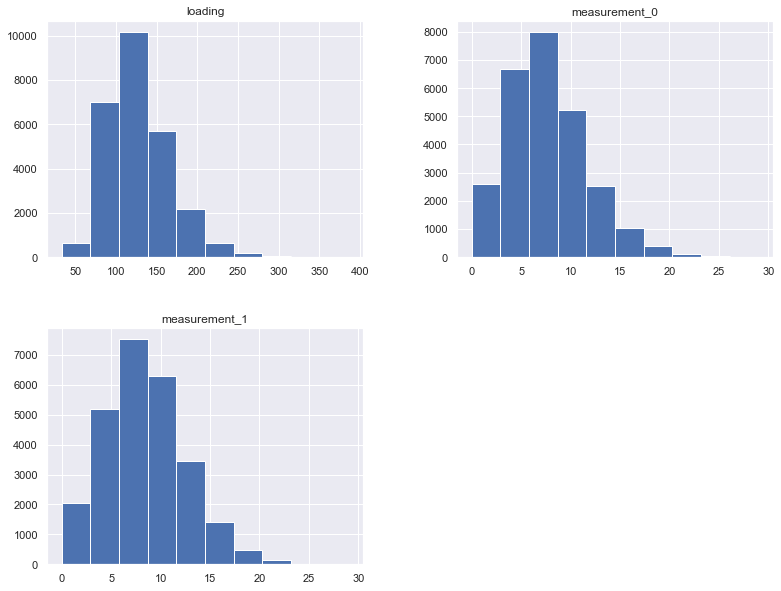

In [16]:
high_std_columns = train_data.std()[train_data.std() > 4].keys().values
train_data[high_std_columns].hist()
None

In [17]:
# train_data['AgeBand'] = 
# train_data.head()

for data in datasets:
    for column in high_std_columns:
        column_bands = pd.cut(data[column], 6)
        print(column_bands.values)
        break
    break

[(32.807, 91.943], (32.807, 91.943], (32.807, 91.943], (91.943, 150.727], (150.727, 209.51], ..., (150.727, 209.51], (91.943, 150.727], (91.943, 150.727], (91.943, 150.727], (91.943, 150.727]]
Length: 26570
Categories (6, interval[float64, right]): [(32.807, 91.943] < (91.943, 150.727] < (150.727, 209.51] < (209.51, 268.293] < (268.293, 327.077] < (327.077, 385.86]]


In [18]:
train_data.shape, valid_data.shape

((26570, 10), (20775, 9))

<AxesSubplot:>

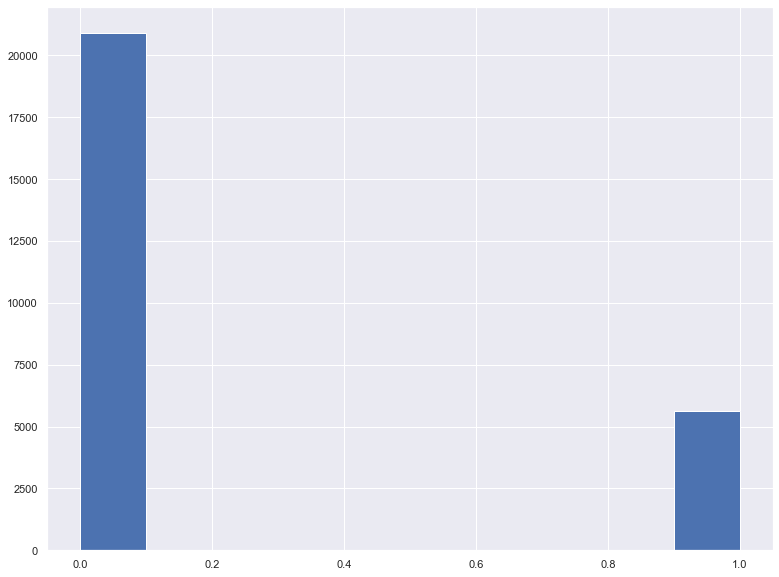

In [19]:
train_data[target].hist()

## Train Model

In [20]:
X = train_data.drop(columns=target)
y = train_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [21]:
params = {
    "n_estimators": range(40, 71, 10),
    "max_depth": range(1, 12, 2),
    # "min_samples_leaf": range(1, 8),
    # "min_samples_split": range(2, 10, 2)
}

In [22]:
clf = RandomForestClassifier()
grid_search_cv = GridSearchCV(clf, params, cv=5, n_jobs=-1)
grid_search_cv.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
best_solution = grid_search_cv.best_estimator_
best_solution

In [ ]:
best_solution.score(X_test, y_test)

In [ ]:
solution = best_solution.predict(valid_data)

## Add solution

In [ ]:
submission = pd.read_csv("./data/sample_submission.csv")

In [ ]:
submission[target] = solution

In [ ]:
submission

In [ ]:
submission[["id", target]].to_csv("./data/solution.csv", index=False)

In [ ]:
submission[["id", target]]